**We load the various packages used for this project**
- pandas
- matplotlib

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Using this [data](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv) we are going to explore the following:

- The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.
- Highlight the marked difference between consumption and emissions in certain food product of your choice
- The food consumption of animal and non-animal products and the impact on carbon footprint. 
- Beef's contribution to CO2 emissions (kg/person/year) 
- A box plot and interpretation of the CO2 contributions of food levels.
- Top 10 Countries with highest emissions. Choose the appropriate visual type. 
- Using the data to write a 500 words minimum of insights and the story behind the exploration.
- Alternatively compile a set of slides with your insights.

In [2]:
url= "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv"
data= pd.read_csv(url)
data

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


### The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.

In [4]:
countries = ["Kenya", "Uganda", "Tanzania", "Rwanda", "Ethiopia"]
east_africa= data[data["country"].isin(countries)]
average_Co2= east_africa.groupby("country")["co2_emmission"].mean()
print(average_Co2)

country
Ethiopia    21.992727
Kenya       48.258182
Rwanda      16.511818
Tanzania    31.183636
Uganda      27.701818
Name: co2_emmission, dtype: float64


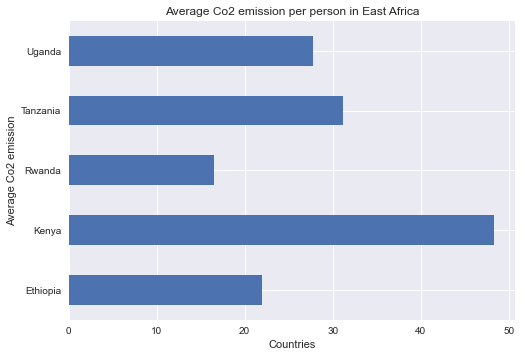

In [5]:
plt.style.use("seaborn")

average_Co2.plot.barh()
plt.xlabel("Countries")
plt.ylabel("Average Co2 emission")
plt.title("Average Co2 emission per person in East Africa")

plt.savefig("Average Co2 emission East Africa.png")

plt.show()

### Highlight the marked difference between consumption and emissions in certain food product of your choice

In [6]:
countries = ["Kenya", "Uganda", "Tanzania", "Rwanda", "Ethiopia"]
meat =["Pork", "Beef", "Poultry", "Lamb & Goat", "Fish"]

products= data[data["food_category"].isin(meat) & data["country"].isin(countries)]
average_Co2= products.groupby("country").mean()
print(average_Co2)

          consumption  co2_emmission
country                             
Ethiopia        1.220         33.508
Kenya           3.286         73.574
Rwanda          2.088         31.198
Tanzania        3.006         48.928
Uganda          4.756         47.240


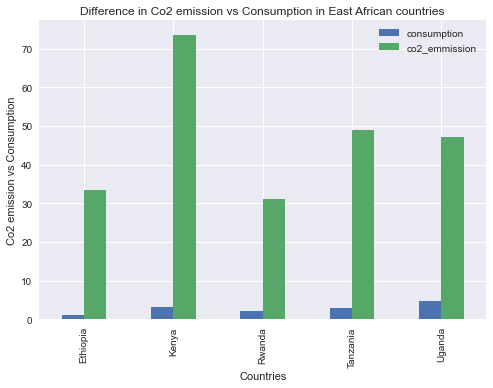

In [7]:
plt.style.use("seaborn")

average_Co2.plot.bar()
plt.xlabel("Countries")
plt.ylabel("Co2 emission vs Consumption")
plt.title("Difference in Co2 emission vs Consumption in East African countries")

plt.savefig("Co2 emission vs Consumption.png")

plt.show()

### The food consumption of animal and non-animal products and the impact on carbon footprint.

In [8]:
animal =["Pork", "Beef", "Poultry", "Lamb & Goat", "Fish"]
non_animal= ["Eggs", "Soybeans", "Milk - inc. cheese", "Rice", "Wheat and Wheat Products"]

# Calculate the total consumption of animal and non-animal products in terms consumption.
average_animal_consumption = data.loc[data["food_category"].isin(animal), "consumption"].mean()
average_non_animal_consumption = data.loc[data["food_category"].isin(non_animal), "consumption"].mean()

# Calculate the total carbon footprint of animal and non-animal products
average_animal_footprint = data.loc[data["food_category"].isin(animal), "co2_emmission"].mean()
average_non_animal_footprint = data.loc[data["food_category"].isin(non_animal), "co2_emmission"].mean()

print(average_animal_consumption)
print(average_non_animal_consumption)
print(average_animal_footprint)
print(average_non_animal_footprint)

data1 = pd.DataFrame({
    "Average Consumption": [average_animal_consumption, average_non_animal_consumption],
    "Average Carbon Footprint": [average_animal_footprint, average_non_animal_footprint]
}, index=["Animal Products", "Non-Animal Products"])

13.870707692307679
47.14473846153844
114.52481538461551
47.65536923076921


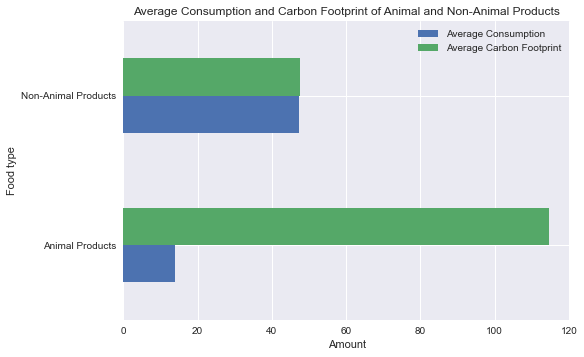

In [9]:
plt.style.use("seaborn")

data1.plot.barh()
plt.xlabel("Amount")
plt.ylabel("Food type")
plt.title("Average Consumption and Carbon Footprint of Animal and Non-Animal Products")

plt.savefig("Animal and Non-Animal Products.png")

plt.show()

In [10]:
carbon = data.groupby("food_category")["co2_emmission"].agg(["mean","median"])

carbon_sorted = carbon.sort_values(by=["mean","median"], ascending=[True,True])
print(carbon_sorted)

                                mean   median
food_category                                
Soybeans                    0.387308    0.035
Nuts inc. Peanut Butter     7.323000    6.185
Eggs                        7.499615    7.735
Wheat and Wheat Products   13.644462   13.240
Poultry                    22.793538   21.325
Fish                       27.601692   22.270
Rice                       37.591615   15.200
Pork                       57.070077   36.650
Lamb & Goat                91.056769   46.405
Milk - inc. cheese        179.153846  158.075
Beef                      374.102000  255.655


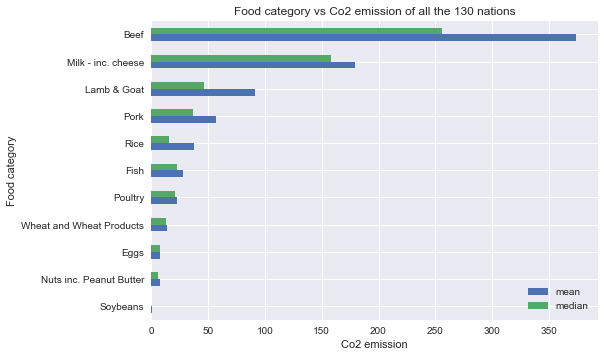

In [11]:
plt.style.use("seaborn")

carbon_sorted.plot.barh()
plt.xlabel("Co2 emission")
plt.ylabel("Food category")
plt.title("Food category vs Co2 emission of all the 130 nations")

plt.savefig("Food category vs Co2 emission.png")

plt.show()

### Beef's contribution to CO2 emissions (kg/person/year)

In [12]:
beef =data.groupby("food_category")["co2_emmission"].sum().loc["Beef"]

beef

48633.26

In [13]:
filt =data["food_category"] == "Beef"
beef_emmissions= data.loc[filt, "co2_emmission"].sum()

### A box plot and interpretation of the CO2 contributions of food levels.

In [14]:
carbon = data.groupby("food_category")["co2_emmission"].sum()

carbon_sorted = carbon.sort_values(ascending=False)
print(carbon_sorted)

food_category
Beef                        48633.26
Milk - inc. cheese          23290.00
Lamb & Goat                 11837.38
Pork                         7419.11
Rice                         4886.91
Fish                         3588.22
Poultry                      2963.16
Wheat and Wheat Products     1773.78
Eggs                          974.95
Nuts inc. Peanut Butter       951.99
Soybeans                       50.35
Name: co2_emmission, dtype: float64


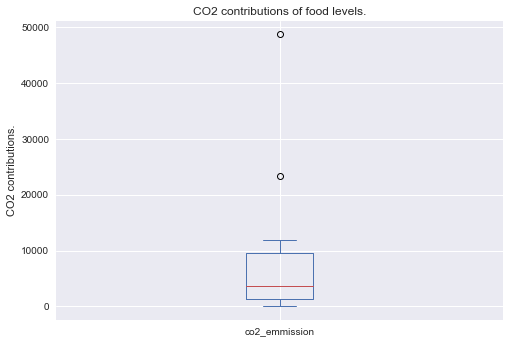

In [15]:
plt.style.use("seaborn")

carbon_sorted.plot.box(showfliers=True)
plt.ylabel("CO2 contributions.")
plt.title("CO2 contributions of food levels.")

plt.savefig("BoxPlot.png")

plt.show()

### Top 10 Countries with highest emissions. Choose the appropriate visual type.

In [16]:
emission = data.groupby("country")["co2_emmission"].sum()
highest_emission= emission.sort_values(ascending=False).head(10)

In [17]:
highest_emission

country
Argentina      2172.40
Australia      1938.66
Albania        1777.85
New Zealand    1750.95
Iceland        1731.36
USA            1718.86
Uruguay        1634.91
Brazil         1616.73
Luxembourg     1598.41
Kazakhstan     1575.08
Name: co2_emmission, dtype: float64

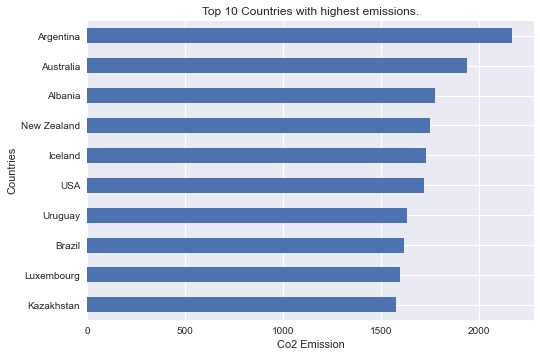

In [18]:
plt.style.use("seaborn")

highest_emission[::-1].plot.barh()
plt.xlabel("Co2 Emission")
plt.ylabel("Countries")
plt.title("Top 10 Countries with highest emissions.")

plt.savefig("Highest emissions.png")

plt.show()